## Exploratory Data Analysis (EDA) of Stanford Cars Dataset

- In this notebook we explore some characteristics of the Stanford Cars Dataset.
- The dataset used for this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/jessicali9530/stanford-cars-dataset), since the original [Stanford link](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) no longer seems to be working.

Characteristics Explored:
- 1: [File Extensions](###EDA---File-Extensions)
- 2: [Image Resolution Distribution](###EDA---Image-Resolution-Distribution)
- 3: [Channels](###EDA---Channels)
- 4: [Class Distribution](###EDA---Class-Distribution)
- 5: [Display Random Images](###Display-Random-Images-for-Inspection)

In [12]:
from pathlib import Path
import sys
import os
import matplotlib.pyplot as plt

# Add project root to sys.path if it does not exist
project_root = Path().resolve().parents[0]
if str(project_root) not in sys.path:
    sys.path.insert(0,str(project_root))

from utils.utils import check_file_extensions, get_image_resolutions, channel_count, display_random_images

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
train_dir = project_root / "data" / "train"
test_dir = project_root / "data" / "test"

[OPTIONAL] Uncomment the cell below to get a sample of images in `train` folder, of sample_size, in `train_sampled` folder.

In [15]:
# destination_dir = project_root / "data" / "train_sampled"

# sample_size = 5

# os.makedirs(destination_dir, exist_ok=True)

# # Get samples from each folder
# for class_folder in os.listdir(train_dir):
#     subfolder_path = os.path.join(train_dir, class_folder)
    
#     if os.path.isdir(subfolder_path):  # Ensure it's a directory
#         # Get all image files in the subfolder
#         images = [img for img in os.listdir(subfolder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
#         # Randomly sample images
#         sampled_images = random.sample(images, min(sample_size, len(images)))
        
#         # Create a corresponding subfolder in the destination directory
#         class_destination = os.path.join(destination_dir, class_folder)
#         os.makedirs(class_destination, exist_ok=True)
        
#         # Copy sampled images to the new subfolder
#         for image in sampled_images:
#             shutil.copy(os.path.join(subfolder_path, image), os.path.join(class_destination, image))
            
# print("Sampling completed!")

### EDA - File Extensions

In [16]:
# Check for unique file extensions
train_file_extensions = check_file_extensions(train_dir)
print("Unique file extensions in the train dataset:", train_file_extensions)

test_file_extensions = check_file_extensions(test_dir)
print("Unique file extensions in the test dataset:", test_file_extensions)

Unique file extensions in the train dataset: {'.jpg'}
Unique file extensions in the test dataset: {'.jpg'}


### EDA - Image Resolution Distribution

In [17]:
# Get image resolutions for train and test datasets
train_image_resolutions = get_image_resolutions(train_dir)
test_image_resolutions = get_image_resolutions(test_dir)

# Separate widths and heights
train_widths, train_heights = zip(*train_image_resolutions)
test_widths, test_heights = zip(*test_image_resolutions)

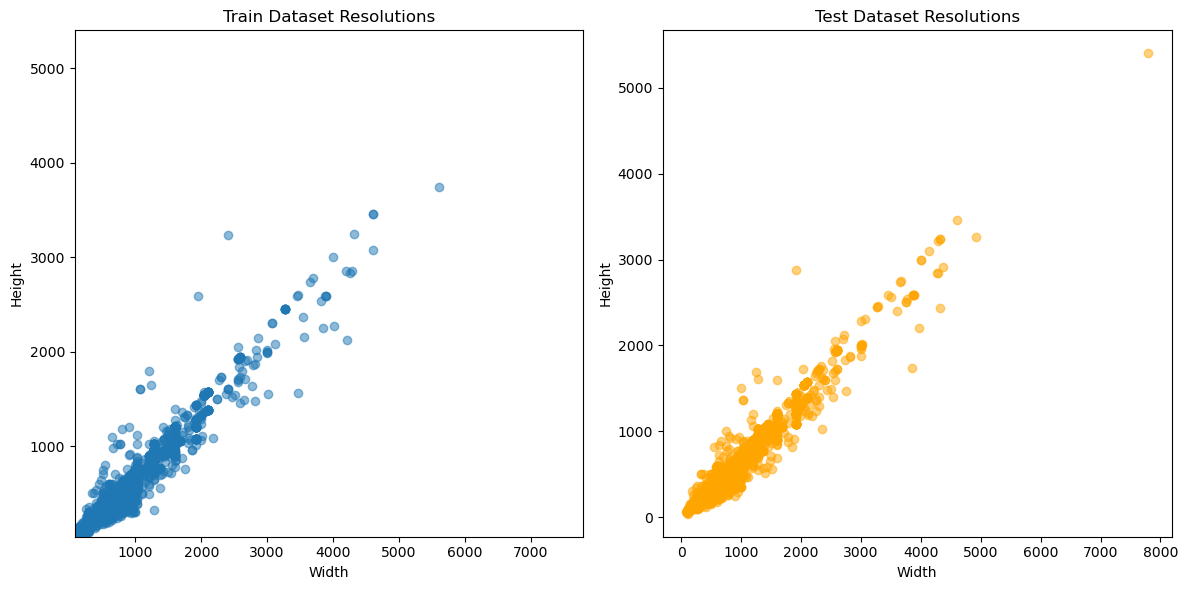

In [18]:
# Determine the global x and y axis limits
all_widths = train_widths + test_widths
all_heights = train_heights + test_heights
x_min, x_max = min(all_widths), max(all_widths)
y_min, y_max = min(all_heights), max(all_heights)

# Plot side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train dataset plot
axes[0].scatter(train_widths, train_heights, alpha=0.5)
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Train Dataset Resolutions')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Test dataset plot
axes[1].scatter(test_widths, test_heights, alpha=0.5, color='orange')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Height')
axes[1].set_title('Test Dataset Resolutions')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

* Image resolution varies quite a bit, with majority of the images being within 1500 px (height) x 2000 px (width).
* Resizing of images will have to be done to ensure uniformity.

### EDA - Channels

In [19]:
train_image_formats, train_channel_counts = channel_count(train_dir)
print(train_image_formats, train_channel_counts)

{'JPEG': 8144} {3: 8126, 1: 18}


The train images are all jpeg file formats. Majority of them have 3 channels, ie. they are RGB images. 18 images are grayscale, having only 1 channel. 

In [20]:
test_image_formats, test_channel_counts = channel_count(test_dir)
print(test_image_formats, test_channel_counts)

{'JPEG': 8041} {3: 8025, 1: 16}


Similarly, the test images are all jpeg file formats. Almost all of them have 3 channels, ie. they are RGB images. Only 1 image is grayscale.

### EDA - Class Distribution

In [21]:
# Extract class names (subfolder names)
target_classes = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]

print("Target Classes:", target_classes)

Target Classes: ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Ford Mustang Convertible 2007', 'Buick Rainier SUV 2007', 'Jeep Compass SUV 2012', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Ford Edge SUV 2012', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Bentley Continental Supersports Conv. Convertible 2012', 'Land Rover Range Rover SUV 2012', 'Hyundai Tucson SUV 2012', 'Honda Odyssey Minivan 2007', 'Audi 100 Wagon 1994', 'Dodge Challenger SRT8 2011', 'Mercedes-Benz Sprinter Van 2012', 'Bentley Continental GT Coupe 2012', 'Rolls-Royce Ghost Sedan 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', 'Dodge Charger SRT-8 2009', 'Volkswagen Beetle Hatchback 2012', 'Audi TT RS Coupe 2012', 'Acura TSX Sedan 2012', 'Jaguar XK XKR 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Honda Accord Sedan 2012', 'BMW X5 SUV 2007', 'Ford F-150 Regular Cab 2007', 'Aston Martin 

In [22]:
len(target_classes)

196

There are a total of 196 classes that we are working with.

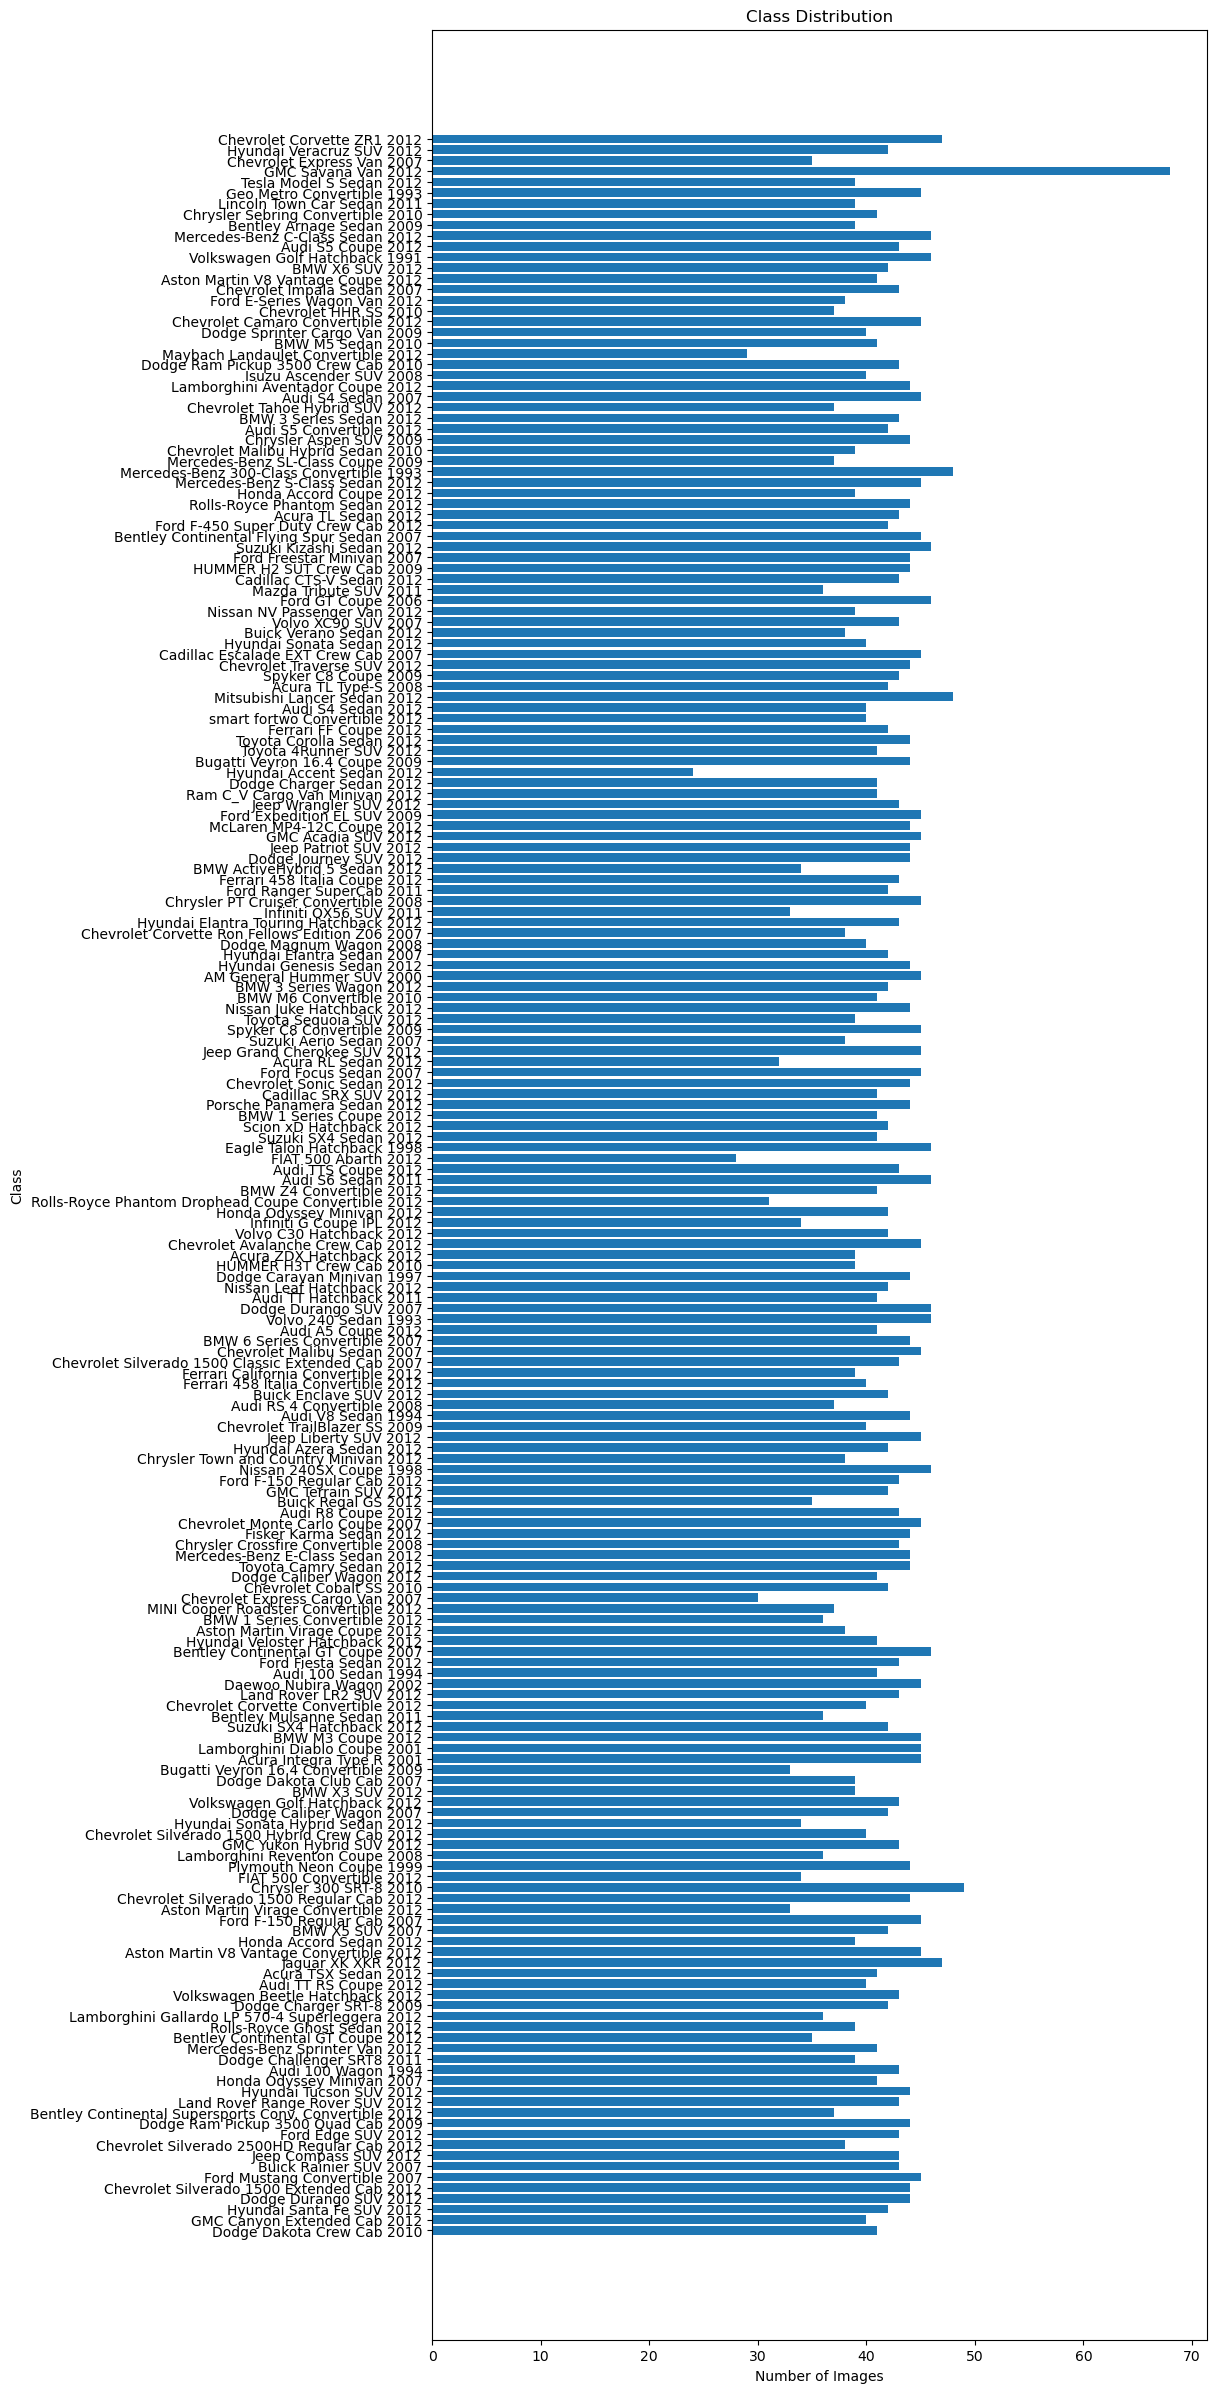

In [25]:
class_distribution = {}

for root, dirs, files in os.walk(train_dir):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        class_images = [file for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_distribution[dir] = len(class_images)

# Plotting the class distribution
classes = list(class_distribution.keys())
image_counts = list(class_distribution.values())

plt.figure(figsize=(10,30))
plt.barh(classes, image_counts)
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Class Distribution')
plt.xticks()
plt.show()

In [26]:
# Find key with highest value
max_key = max(class_distribution, key=class_distribution.get)
print(f"Class with the highest number of images: {max_key} with {class_distribution[max_key]} images.")

Class with the highest number of images: GMC Savana Van 2012 with 68 images.


In [27]:
# Find key with lowest value
min_key = min(class_distribution, key=class_distribution.get)
print(f"Class with the lowest number of images: {min_key} with {class_distribution[min_key]} images.")

Class with the lowest number of images: Hyundai Accent Sedan 2012 with 24 images.


In [28]:
# Find avg
average_per_class = int(sum(class_distribution.values())/len(class_distribution))
print(f"The average number of images per class is {average_per_class}.")

The average number of images per class is 41.


Class distribution is generally somewhat even; with the highest being 68 (GMC Savana Van 2012) and the lowest being 28 (FIAT 500 Abarth 200).

### Display Random Images for Inspection

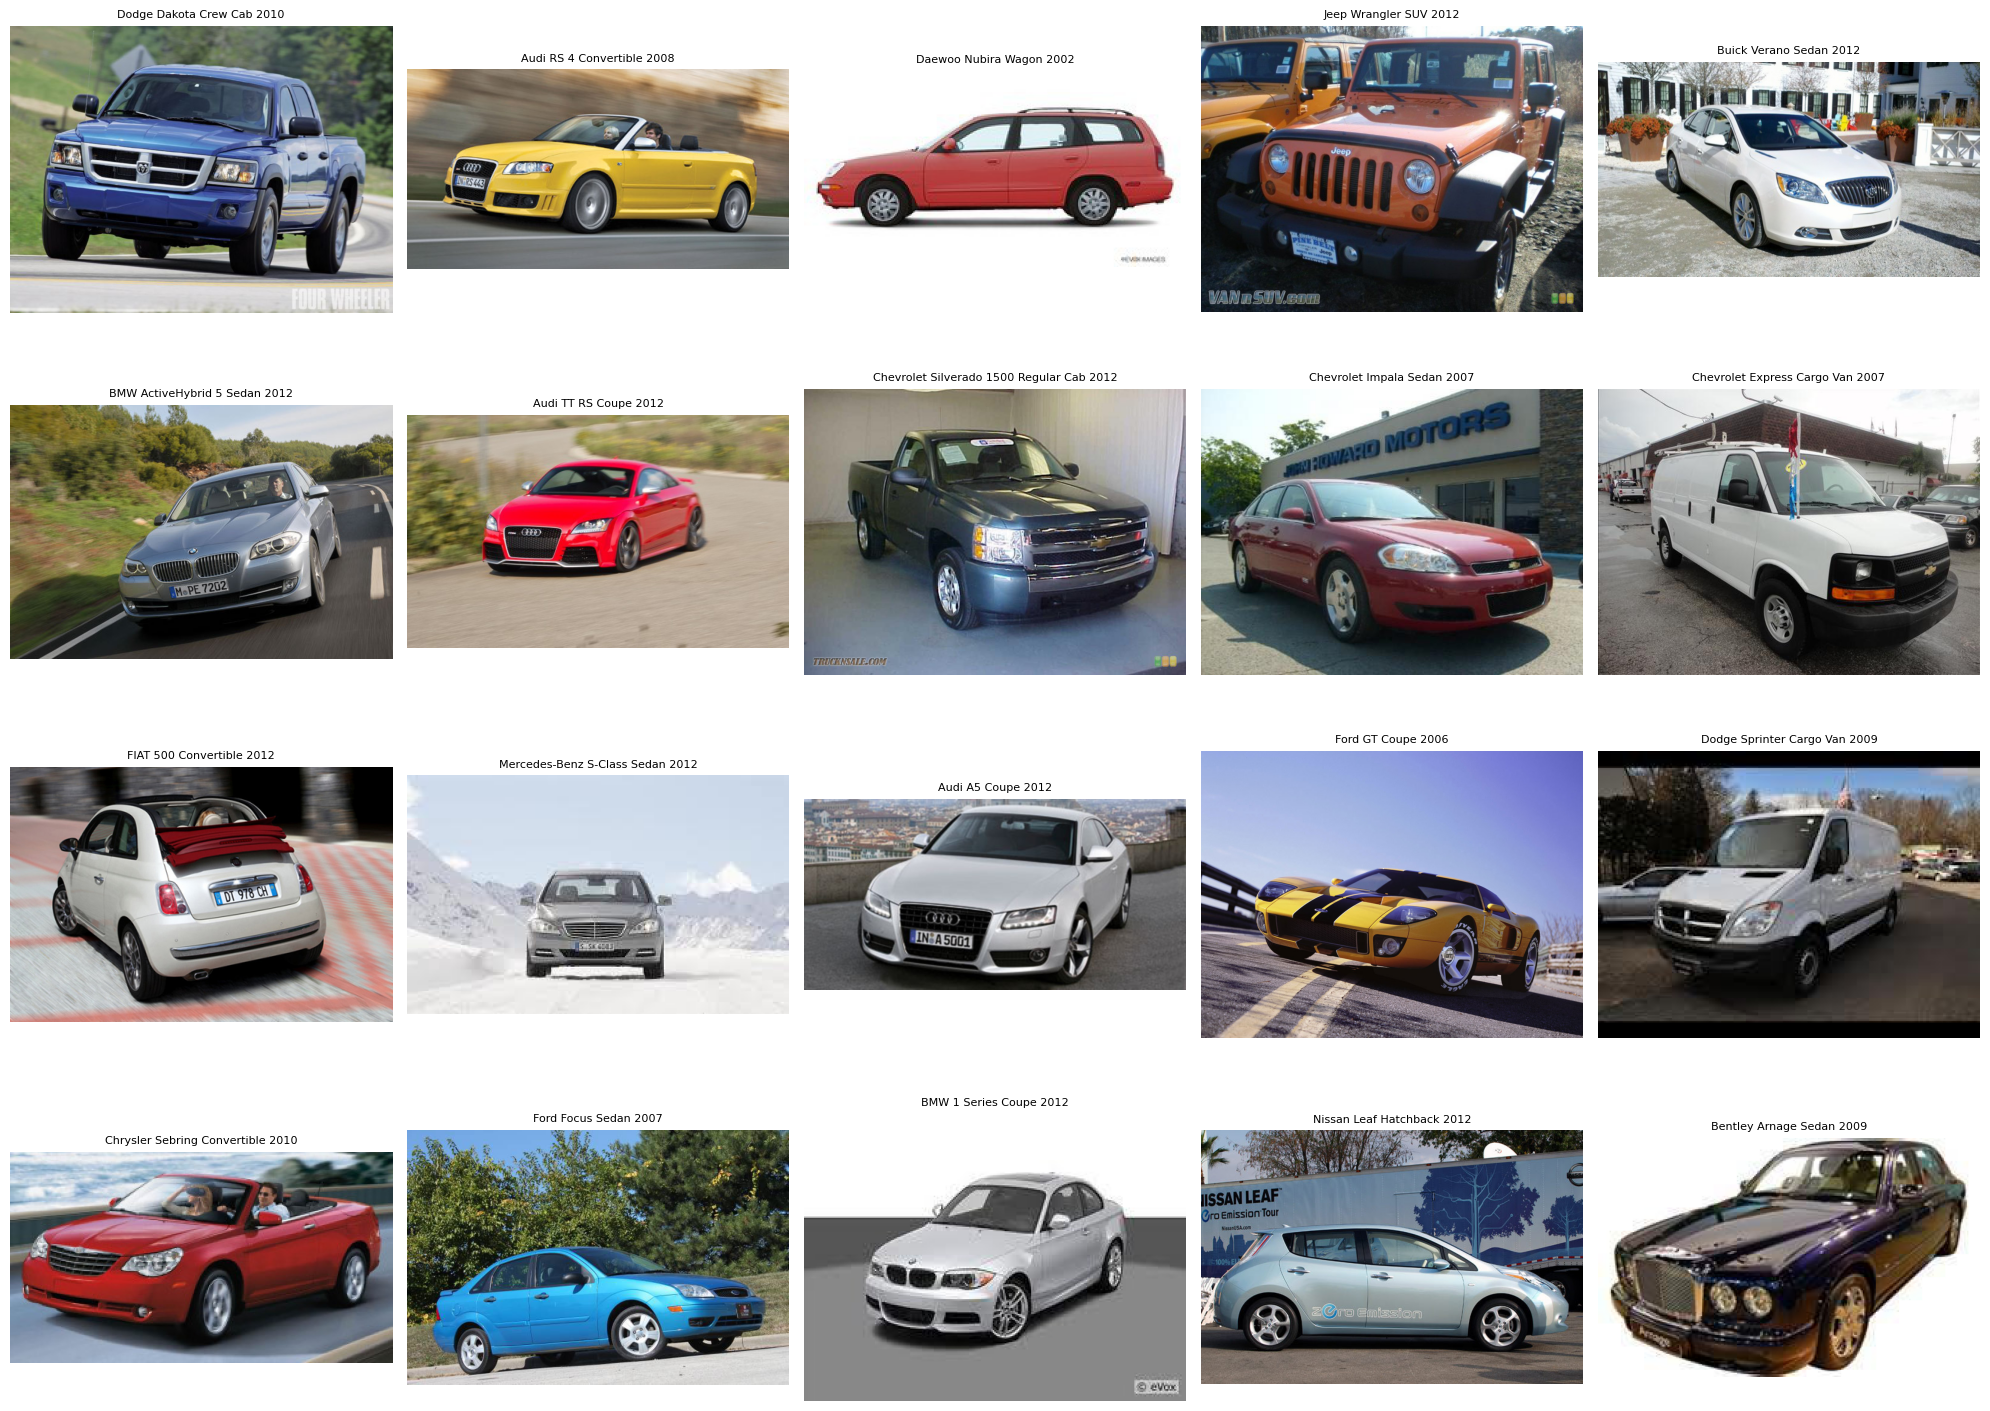

In [30]:
# Display random images - run this cell as many times as required to view a selection of images
display_random_images(train_dir, num_classes=20, grid_size=(4, 5), fig_size=(20, 15))

Comments on images/data and implications during preprocessing/augmentation:
* The cars are generally in the centre of the images.
* The size of the car varies, may range from 25% - 90% of the image - can center crop slightly
* Images are mostly in landscape orientation.
* They are in varied settings (in showroom, on the road, off road settings)
* Background is not always quiet: there may be other objects. Some have background removed; some have pronounced shadow.
* They are taken from different angles: front-on, side, diagonal, from the back. Can perform some affine transformations
* Some images have overlaying text or additional text in background
* All images have the car the right side up - would not make sense to flip about x-axis during augmentation